# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, I present the methods employed to gather **all** three pieces of data for this project and load them in the notebook. **Note:** the method I have used to gather each dataset is different
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import tweepy
import json
import time
from PIL import Image
from io import BytesIO
import re

In [2]:
#Load the twitter archive enhanced file provided

df_tweet_rating = pd.read_csv('twitter-archive-enhanced.csv')
df_tweet_rating.head(1)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   

   rating_denominator     name doggo floofer pupper puppo  
0                  10  Phineas  None    None   None  None

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#download the image predictions data programmatically
#import dependencies
import requests
    
#get the content of the url    
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# to Save HTML to file
with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [4]:
#load the image prediction dataset
df_image_pred = pd.read_csv('image-predictions.tsv', sep = '\t')

#save to file as .csv for easy access by MS excel
df_image_pred.to_csv('image-predictions.csv', index = False)
df_image_pred.head(1)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   

   img_num                      p1   p1_conf  p1_dog      p2   p2_conf  \
0        1  Welsh_springer_spaniel  0.465074    True  collie  0.156665   

   p2_dog                 p3   p3_conf  p3_dog  
0    True  Shetland_sheepdog  0.061428    True

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
#download data using twitter API


consumer_key = '***********'
consumer_secret = '************'
access_token = '************'
access_secret = '*************'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True)


In [10]:
# get the tweetID information from df_archive 
tw_id = df_tweet_rating.tweet_id.values
tw_id[:3]

[892420643555336193, 892177421306343426, 891815181378084864]

In [13]:
#Append the json file to a tweet_jason.txt file

import time

count = 0
error_dict = {}
begin = time.time()

with open('tweet_json.txt', 'w') as file:
    
    for i in tw_id:
        count+=1
        try:
            tweet = api.get_status(i, tweet_mode='extended')
            print(count,':  ', i)
            json.dump(tweet._json, file)
            file.write("\n")
            print('success')
        except tweepy.TweepError as e:
            print('fail')
            error_dict[i] = e
stop = time.time()
print('time is ', stop - begin)


1 :   892420643555336193
success
2 :   892177421306343426
success
3 :   891815181378084864
success
4 :   891689557279858688
success
5 :   891327558926688256
success
6 :   891087950875897856
success
7 :   890971913173991426
success
8 :   890729181411237888
success
9 :   890609185150312448
success
10 :   890240255349198849
success
11 :   890006608113172480
success
12 :   889880896479866881
success
13 :   889665388333682689
success
14 :   889638837579907072
success
15 :   889531135344209921
success
16 :   889278841981685760
success
17 :   888917238123831296
success
18 :   888804989199671297
success
19 :   888554962724278272
success
fail
21 :   888078434458587136
success
22 :   887705289381826560
success
23 :   887517139158093824
success
24 :   887473957103951883
success
25 :   887343217045368832
success
26 :   887101392804085760
success
27 :   886983233522544640
success
28 :   886736880519319552
success
29 :   886680336477933568
success
30 :   886366144734445568
success
31 :   88626700928

fail
249 :   845397057150107648
success
250 :   845306882940190720
success
251 :   845098359547420673
success
252 :   844979544864018432
success
253 :   844973813909606400
success
fail
255 :   844580511645339650
success
256 :   844223788422217728
success
257 :   843981021012017153
success
258 :   843856843873095681
success
259 :   843604394117681152
success
260 :   843235543001513987
success
fail
262 :   842846295480000512
success
263 :   842765311967449089
success
264 :   842535590457499648
success
265 :   842163532590374912
success
266 :   842115215311396866
success
267 :   841833993020538882
success
268 :   841680585030541313
success
269 :   841439858740625411
success
270 :   841320156043304961
success
271 :   841314665196081154
success
272 :   841077006473256960
success
273 :   840761248237133825
success
274 :   840728873075638272
success
275 :   840698636975636481
success
276 :   840696689258311684
success
277 :   840632337062862849
success
278 :   840370681858686976
success
279 :

490 :   813910438903693312
success
491 :   813812741911748608
success
492 :   813800681631023104
success
493 :   813217897535406080
success
494 :   813202720496779264
success
495 :   813187593374461952
success
496 :   813172488309972993
success
497 :   813157409116065792
success
498 :   813142292504645637
success
499 :   813130366689148928
success
500 :   813127251579564032
success
501 :   813112105746448384
success
502 :   813096984823349248
success
503 :   813081950185472002
success
504 :   813066809284972545
success
505 :   813051746834595840
success
506 :   812781120811126785
success
fail
508 :   812709060537683968
success
509 :   812503143955202048
success
510 :   812466873996607488
success
511 :   812372279581671427
success
512 :   811985624773361665
success
513 :   811744202451197953
success
514 :   811647686436880384
success
515 :   811627233043480576
success
516 :   811386762094317568
success
517 :   810984652412424192
success
518 :   810896069567610880
success
519 :   8106575

727 :   782598640137187329
success
728 :   782305867769217024
success
729 :   782021823840026624
success
730 :   781955203444699136
success
731 :   781661882474196992
success
732 :   781655249211752448
success
733 :   781524693396357120
success
734 :   781308096455073793
success
735 :   781251288990355457
success
736 :   781163403222056960
success
737 :   780931614150983680
success
738 :   780858289093574656
success
739 :   780800785462489090
success
740 :   780601303617732608
success
741 :   780543529827336192
success
742 :   780496263422808064
success
743 :   780476555013349377
success
744 :   780459368902959104
success
745 :   780192070812196864
success
746 :   780092040432480260
success
747 :   780074436359819264
success
748 :   779834332596887552
success
749 :   779377524342161408
success
750 :   779124354206535695
success
fail
752 :   779056095788752897
success
753 :   778990705243029504
success
754 :   778774459159379968
success
755 :   778764940568104960
success
756 :   7787489

968 :   750381685133418496
success
969 :   750147208377409536
success
970 :   750132105863102464
success
971 :   750117059602808832
success
972 :   750101899009982464
success
973 :   750086836815486976
success
974 :   750071704093859840
success
975 :   750056684286914561
success
976 :   750041628174217216
success
977 :   750026558547456000
success
978 :   750011400160841729
success
979 :   749996283729883136
success
980 :   749981277374128128
success
981 :   749774190421639168
success
982 :   749417653287129088
success
983 :   749403093750648834
success
984 :   749395845976588288
success
985 :   749317047558017024
success
986 :   749075273010798592
success
987 :   749064354620928000
success
988 :   749036806121881602
success
989 :   748977405889503236
success
990 :   748932637671223296
success
991 :   748705597323898880
success
992 :   748699167502000129
success
993 :   748692773788876800
success
994 :   748575535303884801
success
995 :   748568946752774144
success
996 :   748346686624

1197 :   717047459982213120
success
1198 :   717009362452090881
success
1199 :   716802964044845056
success
1200 :   716791146589110272
success
1201 :   716730379797970944
success
1202 :   716447146686459905
success
1203 :   716439118184652801
success
1204 :   716285507865542656
success
1205 :   716080869887381504
success
1206 :   715928423106027520
success
1207 :   715758151270801409
success
1208 :   715733265223708672
success
1209 :   715704790270025728
success
1210 :   715696743237730304
success
1211 :   715680795826982913
success
1212 :   715360349751484417
success
1213 :   715342466308784130
success
1214 :   715220193576927233
success
1215 :   715200624753819648
success
1216 :   715009755312439296
success
1217 :   714982300363173890
success
1218 :   714962719905021952
success
1219 :   714957620017307648
success
1220 :   714631576617938945
success
1221 :   714606013974974464
success
1222 :   714485234495041536
success
1223 :   714258258790387713
success
1224 :   714251586676113411


1426 :   697943111201378304
success
1427 :   697881462549430272
success
1428 :   697630435728322560
success
1429 :   697616773278015490
success
1430 :   697596423848730625
success
1431 :   697575480820686848
success
1432 :   697516214579523584
success
1433 :   697482927769255936
success
1434 :   697463031882764288
success
1435 :   697270446429966336
success
1436 :   697259378236399616
success
1437 :   697255105972801536
success
1438 :   697242256848379904
success
1439 :   696900204696625153
success
1440 :   696894894812565505
success
1441 :   696886256886657024
success
1442 :   696877980375769088
success
1443 :   696754882863349760
success
1444 :   696744641916489729
success
1445 :   696713835009417216
success
1446 :   696518437233913856
success
1447 :   696490539101908992
success
1448 :   696488710901260288
success
1449 :   696405997980676096
success
1450 :   696100768806522880
success
1451 :   695816827381944320
success
1452 :   695794761660297217
success
1453 :   695767669421768709


1655 :   683449695444799489
success
1656 :   683391852557561860
success
1657 :   683357973142474752
success
1658 :   683142553609318400
success
1659 :   683111407806746624
success
1660 :   683098815881154561
success
1661 :   683078886620553216
success
1662 :   683030066213818368
success
1663 :   682962037429899265
success
1664 :   682808988178739200
success
1665 :   682788441537560576
success
1666 :   682750546109968385
success
1667 :   682697186228989953
success
1668 :   682662431982772225
success
1669 :   682638830361513985
success
1670 :   682429480204398592
success
1671 :   682406705142087680
success
1672 :   682393905736888321
success
1673 :   682389078323662849
success
1674 :   682303737705140231
success
1675 :   682259524040966145
success
1676 :   682242692827447297
success
1677 :   682088079302213632
success
1678 :   682059653698686977
success
1679 :   682047327939461121
success
1680 :   682032003584274432
success
1681 :   682003177596559360
success
1682 :   681981167097122816


1885 :   674800520222154752
success
1886 :   674793399141146624
success
1887 :   674790488185167872
success
1888 :   674788554665512960
success
1889 :   674781762103414784
success
1890 :   674774481756377088
success
1891 :   674767892831932416
success
1892 :   674764817387900928
success
1893 :   674754018082705410
success
1894 :   674752233200820224
success
1895 :   674743008475090944
success
1896 :   674742531037511680
success
1897 :   674739953134403584
success
1898 :   674737130913071104
success
1899 :   674690135443775488
success
1900 :   674670581682434048
success
1901 :   674664755118911488
success
1902 :   674646392044941312
success
1903 :   674644256330530816
success
1904 :   674638615994089473
success
1905 :   674632714662858753
success
1906 :   674606911342424069
success
1907 :   674468880899788800
success
1908 :   674447403907457024
success
1909 :   674436901579923456
success
1910 :   674422304705744896
success
1911 :   674416750885273600
success
1912 :   674410619106390016


2113 :   670435821946826752
success
2114 :   670434127938719744
success
2115 :   670433248821026816
success
2116 :   670428280563085312
success
2117 :   670427002554466305
success
2118 :   670421925039075328
success
2119 :   670420569653809152
success
2120 :   670417414769758208
success
2121 :   670411370698022913
success
2122 :   670408998013820928
success
2123 :   670403879788544000
success
2124 :   670385711116361728
success
2125 :   670374371102445568
success
2126 :   670361874861563904
success
2127 :   670338931251150849
success
2128 :   670319130621435904
success
2129 :   670303360680108032
success
2130 :   670290420111441920
success
2131 :   670093938074779648
success
2132 :   670086499208155136
success
2133 :   670079681849372674
success
2134 :   670073503555706880
success
2135 :   670069087419133954
success
2136 :   670061506722140161
success
2137 :   670055038660800512
success
2138 :   670046952931721218
success
2139 :   670040295598354432
success
2140 :   670037189829525505


2341 :   666099513787052032
success
2342 :   666094000022159362
success
2343 :   666082916733198337
success
2344 :   666073100786774016
success
2345 :   666071193221509120
success
2346 :   666063827256086533
success
2347 :   666058600524156928
success
2348 :   666057090499244032
success
2349 :   666055525042405380
success
2350 :   666051853826850816
success
2351 :   666050758794694657
success
2352 :   666049248165822465
success
2353 :   666044226329800704
success
2354 :   666033412701032449
success
2355 :   666029285002620928
success
2356 :   666020888022790149
success
time is  1480.2355065345764
{}


In [14]:
print(error_dict)


{888202515573088257: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 873697596434513921: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 872668790621863937: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 872261713294495745: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 869988702071779329: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 866816280283807744: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 861769973181624320: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 856602993587888130: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 856330835276025856: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 851953902622658560: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 851861385021730816: TweepError([{'code': 144, 'message': 'N

I found https://ceaksan.com/en/python-tweepy-twitter-api useful in providing useful insight on tweepy usage

In [5]:
# read the tweet_json.txt and extract the data, save into lists that will be converted into a dataframe

with open('tweet_json.txt', 'r') as file:
    file_list = []
    tweet_id = []
    retweet_count = []
    favourite_count = []
    created_at = []

    data = {'tweet_id':[], 'retweet_count':[], 'favorite_count':[], 'created_at':[] }
    
    for tweet_lines in file.readlines():
        data_dict = json.loads(tweet_lines)
        file_list.append(data_dict)
        
        tweet_id.append(data_dict['id'])
        retweet_count.append(data_dict['retweet_count'])
        favourite_count.append(data_dict['favorite_count'])
        created_at.append(data_dict['created_at'])
        
        data.update({'tweet_id':tweet_id, 'retweet_count':retweet_count, 
                     'favourite_count':favourite_count, 'created_at': created_at})

print(len(tweet_id), len(retweet_count), len(favourite_count), len(created_at))

2327 2327 2327 2327


In [6]:
df_twitterapi = pd.DataFrame(data, columns = ['tweet_id', 'retweet_count', 'favourite_count', 'created_at'])
df_twitterapi.head()

tweet_id  retweet_count  favourite_count  \
0  892420643555336193           7009            33811   
1  892177421306343426           5301            29330   
2  891815181378084864           3481            22049   
3  891689557279858688           7225            36937   
4  891327558926688256           7760            35310   

                       created_at  
0  Tue Aug 01 16:23:56 +0000 2017  
1  Tue Aug 01 00:17:27 +0000 2017  
2  Mon Jul 31 00:18:03 +0000 2017  
3  Sun Jul 30 15:58:51 +0000 2017  
4  Sat Jul 29 16:00:24 +0000 2017

In [7]:
df_twitterapi.to_csv('twitter_api_data.csv', index = False)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [8]:
df_tweet_rating.head(4)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   

   rating_denominator     name doggo floofer pupper puppo  
0                  10  Phineas  None    None   None  None  
1                  10    Tilly  None    None   None  None  
2                  10   Archie  None    None   None  None  
3                  10    Darla  None    None   None  None

In [9]:
df_tweet_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
df_image_pred.head(10)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5  666050758794694657  https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6  666051853826850816  https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7  666055525042405380  https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8  666057090499244032  https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9  666058600524156928  https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   
5        1    Bernese_mountain_dog  0.651137    True    English_springer   
6        1              box_turtle  0.933012   False          mud_turtle   
7        1                    chow  0.692517    True     Tibetan_mastiff   
8        1           shopping_cart  0.962465   False     shopping_basket   
9        1        miniature_poodle  0.201493    True            komondor   

    p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0  0.156665    True            Shetland_sheepdog  0.061428    True  
1  0.074192    True          Rhodesian_ridgeback  0.072010    True  
2  0.138584    True                   bloodhound  0.116197    True  
3  0.360687    True           miniature_pinscher  0.222752    True  
4  0.243682    True                     Doberman  0.154629    True  
5  0.263788    True   Greater_Swiss_Mountain_dog  0.016199    True  
6  0.045885   False                     terrapin  0.017885   False  
7  0.058279    True                     fur_coat  0.054449   False  
8  0.014594   False             golden_retriever  0.007959    True  
9  0.192305    True  soft-coated_wheaten_terrier  0.082086    True

In [11]:
df_image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
df_twitterapi.head(10)

tweet_id  retweet_count  favourite_count  \
0  892420643555336193           7009            33811   
1  892177421306343426           5301            29330   
2  891815181378084864           3481            22049   
3  891689557279858688           7225            36937   
4  891327558926688256           7760            35310   
5  891087950875897856           2601            17811   
6  890971913173991426           1663            10363   
7  890729181411237888          15752            56864   
8  890609185150312448           3620            24522   
9  890240255349198849           6098            27959   

                       created_at  
0  Tue Aug 01 16:23:56 +0000 2017  
1  Tue Aug 01 00:17:27 +0000 2017  
2  Mon Jul 31 00:18:03 +0000 2017  
3  Sun Jul 30 15:58:51 +0000 2017  
4  Sat Jul 29 16:00:24 +0000 2017  
5  Sat Jul 29 00:08:17 +0000 2017  
6  Fri Jul 28 16:27:12 +0000 2017  
7  Fri Jul 28 00:22:40 +0000 2017  
8  Thu Jul 27 16:25:51 +0000 2017  
9  Wed Jul 26 15:59:51 +0000 2017

In [13]:
df_twitterapi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
tweet_id           2327 non-null int64
retweet_count      2327 non-null int64
favourite_count    2327 non-null int64
created_at         2327 non-null object
dtypes: int64(3), object(1)
memory usage: 72.8+ KB


### Quality issues

##### df_image_pred

1. Rename column names that do not have clear descriptions, such as p1, p2, etc.

##### All data tables

2. Wrong datatypes in df_tweet_rating tweet_id. This would be converted to string.
   Wrong datatypes in timestamp, would be changed from object to timestamp

##### df_tweet_rating

3. Unwanted information regarding retweets in df_tweet_rating in retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns, since only the original tweets required, these would be dropped. 

4. Rating_numerator values are incorrectly extracted from text column and do not show decimal numbers. Would be re-extracted.

5. High amount of missing values data in_reply_to_status_id, in_reply_to_user_id columns. These would be dropped

6. Dog names: drop the rows with false dog names e.g. a, the, etc.

7. Source column: Replace entries with understandable descriptions

8. Retweets and Favourite Counts - The retweet and favourite counts cannot be floats as we cannot have decimal numbers in this column. I would convert these to integers.

0. The information in the df_twitterapi created_at column is the same as the one in df_tweet_rating timestamp column, but poorly formatted. Would drop df_twitterapi created_at column


### Tidiness issues
1. The doggo, floofer, pupper, and puppo columns whould be conbined to improve tidiness

2. Since each observation unit should represent a table, the df_tweet_rating, df_archive and df_twitterapi would be merged. 

## Cleaning Data
In this section, I would clean **all** of the issues i have documented while assessing. I would start by makin copies of the original dataset before starting to clean the data.


In [14]:
# Make copies of original pieces of data
df_image_pred_copy = df_image_pred.copy()
df_tweet_rating_copy = df_tweet_rating.copy()
df_twitterapi_copy = df_twitterapi.copy()

### Quality issues


### Issue #1:

#### Rename column names that do not have clear descriptions, such as p1, p2, etc.

#### Code

In [15]:
df_image_pred_copy.rename(columns = {'p1': 'first_prediction', 'p2': 'second_prediction', 'p3' : 'third_prediction', 
                           'p1_conf' : 'first_prediction_confidence', 'p2_conf' : 'sec_prediction_confidence', 
                           'p3_conf' : ' third_prediction_confidence', 'p1_dog' : 
                            'first_prediction_correct', 'p2_dog': 'sec_prediction_correct', 
                            'p3_dog': 'third_prediction_correct' }, inplace= True) 

#### Test

In [16]:
df_image_pred_copy.head(2)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   

   img_num        first_prediction  first_prediction_confidence  \
0        1  Welsh_springer_spaniel                     0.465074   
1        1                 redbone                     0.506826   

   first_prediction_correct   second_prediction  sec_prediction_confidence  \
0                      True              collie                   0.156665   
1                      True  miniature_pinscher                   0.074192   

   sec_prediction_correct     third_prediction   third_prediction_confidence  \
0                    True    Shetland_sheepdog                      0.061428   
1                    True  Rhodesian_ridgeback                      0.072010   

   third_prediction_correct  
0                      True  
1                      True

### Issue #2:

#### Wrong datatypes in tweet_id. The tweet_id would be converted from int to string. This is to prevent us from performing statistical operations on the tweet_id


#### Code

In [17]:
type(df_tweet_rating_copy.tweet_id[1])

numpy.int64

In [18]:
df_tweet_rating_copy.tweet_id = df_tweet_rating_copy.tweet_id.astype('str')
df_image_pred_copy.tweet_id = df_image_pred_copy.tweet_id.astype('str')
df_twitterapi_copy.tweet_id = df_twitterapi_copy.tweet_id.astype('str')

In [19]:
type(df_tweet_rating_copy.tweet_id[1])

str

#### Test

In [20]:
# to confirm that all tweet_id in all tables are str types
type(df_tweet_rating_copy.tweet_id[1]) == type(df_image_pred_copy.tweet_id[1])==type(df_twitterapi_copy.tweet_id[1])== str

True

In [21]:
df_tweet_rating_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

####  Wrong datatypes in timestamp, would be changed from object to timestamp


#### Code

In [22]:
df_tweet_rating_copy.timestamp = pd.to_datetime(df_tweet_rating_copy.timestamp)

#### Test

In [23]:
df_tweet_rating_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

In [24]:
type(df_tweet_rating_copy.timestamp[1])

pandas._libs.tslibs.timestamps.Timestamp

### Issue #3:

#### Unwanted information regarding retweets in df_tweet_rating in retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns, since only the original tweets required, these would be dropped. 

#### Code

In [25]:
# drop the rows 
df_tweet_rating_copy=df_tweet_rating_copy[df_tweet_rating_copy.retweeted_status_id.isnull()]
df_tweet_rating_copy=df_tweet_rating_copy[df_tweet_rating_copy.retweeted_status_user_id.isnull()]
df_tweet_rating_copy=df_tweet_rating_copy[df_tweet_rating_copy.retweeted_status_timestamp.isnull()]

In [26]:
df_tweet_rating_copy.drop(columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace = True )

#### Test

In [27]:
df_tweet_rating_copy.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [28]:
df_tweet_rating_copy.shape

(2175, 14)

### Issue #4:

#### Rating_numerator values are incorrectly extracted from text column and do not show decimal numbers. Would be re-extracted.

In [29]:
# sample text with decimal rating_numerator value
df_tweet_rating_copy.text[695]

"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"

#### Code

In [30]:
# extract tbe rating nummerator value
df_tweet_rating_copy['rating_numerator'] = df_tweet_rating_copy['text'].astype(str).str.extract('([0-9]+[.]*[0-9]*)')

In [31]:
# convert rating numerator to float
df_tweet_rating_copy.rating_numerator = pd.to_numeric(df_tweet_rating_copy.rating_numerator)

#### Test

In [32]:
# test the sample
type(df_tweet_rating_copy.rating_numerator[695])

numpy.float64

### Issue #5:

#### High amount of missing values data in_reply_to_status_id, in_reply_to_user_id columns. These would be dropped

#### Code

In [33]:
df_tweet_rating_copy.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id'], axis = 1, inplace = True )

#### Test

In [34]:
df_tweet_rating_copy.head(1)

tweet_id           timestamp  \
0  892420643555336193 2017-08-01 16:23:56   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...              13.0   

   rating_denominator     name doggo floofer pupper puppo  
0                  10  Phineas  None    None   None  None

In [35]:
df_tweet_rating_copy.shape

(2175, 12)

### Issue #6:

#### Dog names: drop the rows with false dog names e.g. a, the, etc.

#### Code

In [36]:
df_tweet_rating_copy.name.value_counts()[:10]

None       680
a           55
Charlie     11
Lucy        11
Cooper      10
Oliver      10
Tucker       9
Penny        9
the          8
Sadie        8
Name: name, dtype: int64

In [37]:
lower_dog_name = df_tweet_rating_copy.name.str.contains('^[a-z]', regex = True)
lower_dog_name = df_tweet_rating_copy[lower_dog_name].name.value_counts().sort_index()
lower_dog_name


a               55
actually         2
all              1
an               6
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             3
life             1
light            1
mad              1
my               1
not              2
officially       1
old              1
one              4
quite            3
space            1
such             1
the              8
this             1
unacceptable     1
very             4
Name: name, dtype: int64

In [38]:
# index the lower cased names
lower_dog_name_index = df_tweet_rating_copy[df_tweet_rating_copy.name.str.islower()].index

In [39]:
# drop the lower cased names
df_tweet_rating_copy.drop(lower_dog_name_index, inplace= True)

#### Test

In [40]:
df_tweet_rating_copy.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya', 'Mingus',
       'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl', 'Lola',
       'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty', 'Gus',
       'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford', 'Dewey',
       'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha', 'Lili',
       'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes

### Issue #7:

### Source column: Replace entries with understandable descriptions

#### Code

In [41]:
df_tweet_rating_copy.source.unique()

array([ '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'], dtype=object)

In [42]:
df_tweet_rating_copy.source.replace({'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':'iPhone',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>':'Web Client',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>':'Vine',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>':'TweetDeck'}, inplace = True)

#### Test

In [43]:
df_tweet_rating_copy.source.unique()

array(['iPhone', 'Web Client', 'Vine', 'TweetDeck'], dtype=object)

### Issue #8:

#### Retweets and Favourite Counts - The retweet and favourite counts cannot be floats as we cannot have decimal numbers in this column. I would convert these to integers.

#### Code

In [44]:
df_twitterapi_copy['retweet_count'] = pd.to_numeric(df_twitterapi_copy['retweet_count'])
df_twitterapi_copy['favourite_count'] = pd.to_numeric(df_twitterapi_copy['favourite_count'])

#### Test

In [45]:
type(df_twitterapi_copy.favourite_count[1])

numpy.int64

### Issue #0:

#### The information in the df_twitterapi created_at column is the same as the one in df_tweet_rating timestamp column, but poorly formatted. Would drop df_twitterapi created_at column

#### Code

In [46]:
df_twitterapi_copy.drop('created_at',axis = 1, inplace = True)

#### Test

In [47]:
df_twitterapi_copy.columns

Index(['tweet_id', 'retweet_count', 'favourite_count'], dtype='object')

### Tidiness issues
1. The doggo, floofer, pupper, and puppo columns should be melted to improve tidiness

2. Since each observation unit should represent a table, the df_tweet_rating, df_archive and df_twitterapi would be merged. 

### Issue #1:

####  Tidying the dog stages columns: None should be replaced, The doggo, floofer, pupper, and puppo columns should be combined to improve tidiness


#### Code

In [48]:
# handle none
df_tweet_rating_copy.doggo.replace('None', '', inplace=True)
df_tweet_rating_copy.floofer.replace('None', '', inplace=True)
df_tweet_rating_copy.pupper.replace('None', '', inplace=True)
df_tweet_rating_copy.puppo.replace('None', '', inplace=True)

# merge into column
df_tweet_rating_copy['dog_stage'] = df_tweet_rating_copy.doggo + df_tweet_rating_copy.floofer + df_tweet_rating_copy.pupper + df_tweet_rating_copy.puppo

# handle multiple stages
df_tweet_rating_copy.loc[df_tweet_rating_copy.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
df_tweet_rating_copy.loc[df_tweet_rating_copy.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
df_tweet_rating_copy.loc[df_tweet_rating_copy.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

# handle missing values
df_tweet_rating_copy.loc[df_tweet_rating_copy.dog_stage == '', 'dog_stage'] = np.nan



In [49]:
df_tweet_rating_copy.sample(10)

tweet_id           timestamp  source  \
427   821153421864615936 2017-01-17 00:33:26  iPhone   
2024  671891728106971137 2015-12-02 03:20:45  iPhone   
1050  743210557239623680 2016-06-15 22:36:19  iPhone   
1996  672591762242805761 2015-12-04 01:42:26  iPhone   
1174  720059472081784833 2016-04-13 01:22:10  iPhone   
207   852553447878664193 2017-04-13 16:05:56  iPhone   
1394  700002074055016451 2016-02-17 17:01:14  iPhone   
31    886258384151887873 2017-07-15 16:17:19  iPhone   
353   831309418084069378 2017-02-14 01:09:44  iPhone   
1260  710269109699739648 2016-03-17 00:58:46  iPhone   

                                                   text  \
427   @imgur for a polar bear tho I'd say 13/10 is a...   
2024  This is Mojo. Apparently he's too cute for a s...   
1050  Meet Kayla, an underground poker legend. Playe...   
1996  This is Taz. He boxes leaves. 10/10 https://t....   
1174  This is Charleson. He lost his plunger. Looked...   
207   This is Jarod. He likes having his belly brush...   
1394  This is Thumas. He covered himself in nanners ...   
31    This is Waffles. His doggles are pupside down....   
353   This is Scooter and his son Montoya.  Scooter ...   
1260  The squad is back for St. Patrick's Day! ☘ 💚\n...   

                                          expanded_urls  rating_numerator  \
427                                                 NaN              13.0   
2024  https://twitter.com/dog_rates/status/671891728...              11.0   
1050  https://twitter.com/dog_rates/status/743210557...              10.0   
1996  https://twitter.com/dog_rates/status/672591762...              10.0   
1174  https://twitter.com/dog_rates/status/720059472...               9.0   
207   https://twitter.com/dog_rates/status/852553447...              13.0   
1394  https://twitter.com/dog_rates/status/700002074...               9.0   
31    https://twitter.com/dog_rates/status/886258384...              13.0   
353   https://twitter.com/dog_rates/status/831309418...              12.0   
1260  https://twitter.com/dog_rates/status/710269109...              13.0   

      rating_denominator       name doggo floofer pupper puppo dog_stage  
427                   10       None                                  NaN  
2024                  10       Mojo                                  NaN  
1050                  10      Kayla                                  NaN  
1996                  10        Taz                                  NaN  
1174                  10  Charleson                                  NaN  
207                   10      Jarod                                  NaN  
1394                  10     Thumas                                  NaN  
31                    10    Waffles                                  NaN  
353                   10    Scooter                                  NaN  
1260                  10       None                                  NaN

In [50]:
# to deal with duplicates, i need to drop the dog stages columns.
df_tweet_rating_copy.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'], inplace = True)

#### Test

In [51]:
df_tweet_rating_copy.shape

(2071, 9)

In [52]:
df_tweet_rating_copy.head(2)

tweet_id           timestamp  source  \
0  892420643555336193 2017-08-01 16:23:56  iPhone   
1  892177421306343426 2017-08-01 00:17:27  iPhone   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...              13.0   
1  https://twitter.com/dog_rates/status/892177421...              13.0   

   rating_denominator     name dog_stage  
0                  10  Phineas       NaN  
1                  10    Tilly       NaN

In [53]:
df_tweet_rating_copy.dog_stage.value_counts()

pupper            213
doggo              73
puppo              24
floofer             9
doggo, pupper       9
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

### Issue #2:

#### Since each observation unit should represent a table,  the df_tweet_rating, df_tweet_rating and df_twitterapi would be merged. 

#### Code

In [54]:
df_tweet_cmb = pd.merge(df_tweet_rating_copy, df_twitterapi_copy, how = 'outer', left_on='tweet_id', right_on='tweet_id')

In [55]:
df_tweet = pd.merge(df_tweet_cmb, df_image_pred_copy, how = 'outer', left_on='tweet_id', right_on='tweet_id')

#### Test

In [56]:
df_tweet.head(10)

tweet_id           timestamp  source  \
0  892420643555336193 2017-08-01 16:23:56  iPhone   
1  892177421306343426 2017-08-01 00:17:27  iPhone   
2  891815181378084864 2017-07-31 00:18:03  iPhone   
3  891689557279858688 2017-07-30 15:58:51  iPhone   
4  891327558926688256 2017-07-29 16:00:24  iPhone   
5  891087950875897856 2017-07-29 00:08:17  iPhone   
6  890971913173991426 2017-07-28 16:27:12  iPhone   
7  890729181411237888 2017-07-28 00:22:40  iPhone   
8  890609185150312448 2017-07-27 16:25:51  iPhone   
9  890240255349198849 2017-07-26 15:59:51  iPhone   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   
5  Here we have a majestic great white breaching ...   
6  Meet Jax. He enjoys ice cream so much he gets ...   
7  When you watch your owner call another dog a g...   
8  This is Zoey. She doesn't want to be one of th...   
9  This is Cassie. She is a college pup. Studying...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...              13.0   
1  https://twitter.com/dog_rates/status/892177421...              13.0   
2  https://twitter.com/dog_rates/status/891815181...              12.0   
3  https://twitter.com/dog_rates/status/891689557...              13.0   
4  https://twitter.com/dog_rates/status/891327558...              12.0   
5  https://twitter.com/dog_rates/status/891087950...              13.0   
6  https://gofundme.com/ydvmve-surgery-for-jax,ht...              13.0   
7  https://twitter.com/dog_rates/status/890729181...              13.0   
8  https://twitter.com/dog_rates/status/890609185...              13.0   
9  https://twitter.com/dog_rates/status/890240255...              14.0   

   rating_denominator      name dog_stage  retweet_count  \
0                10.0   Phineas       NaN         7009.0   
1                10.0     Tilly       NaN         5301.0   
2                10.0    Archie       NaN         3481.0   
3                10.0     Darla       NaN         7225.0   
4                10.0  Franklin       NaN         7760.0   
5                10.0      None       NaN         2601.0   
6                10.0       Jax       NaN         1663.0   
7                10.0      None       NaN        15752.0   
8                10.0      Zoey       NaN         3620.0   
9                10.0    Cassie     doggo         6098.0   

            ...             img_num          first_prediction  \
0           ...                 1.0                    orange   
1           ...                 1.0                 Chihuahua   
2           ...                 1.0                 Chihuahua   
3           ...                 1.0               paper_towel   
4           ...                 2.0                    basset   
5           ...                 1.0  Chesapeake_Bay_retriever   
6           ...                 1.0               Appenzeller   
7           ...                 2.0                Pomeranian   
8           ...                 1.0             Irish_terrier   
9           ...                 1.0                  Pembroke   

   first_prediction_confidence first_prediction_correct   second_prediction  \
0                     0.097049                    False               bagel   
1                     0.323581                     True            Pekinese   
2                     0.716012                     True            malamute   
3                     0.170278                    False  Labrador_retriever   
4                     0.555712                     True    English_springer   
5                     0.425595                     True       Irish_terrier   
6                     0.341703                     True       Borde

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [57]:
df_tweet.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [58]:
df_tweet.head()

tweet_id           timestamp  source  \
0  892420643555336193 2017-08-01 16:23:56  iPhone   
1  892177421306343426 2017-08-01 00:17:27  iPhone   
2  891815181378084864 2017-07-31 00:18:03  iPhone   
3  891689557279858688 2017-07-30 15:58:51  iPhone   
4  891327558926688256 2017-07-29 16:00:24  iPhone   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...              13.0   
1  https://twitter.com/dog_rates/status/892177421...              13.0   
2  https://twitter.com/dog_rates/status/891815181...              12.0   
3  https://twitter.com/dog_rates/status/891689557...              13.0   
4  https://twitter.com/dog_rates/status/891327558...              12.0   

   rating_denominator      name dog_stage  retweet_count  \
0                10.0   Phineas       NaN         7009.0   
1                10.0     Tilly       NaN         5301.0   
2                10.0    Archie       NaN         3481.0   
3                10.0     Darla       NaN         7225.0   
4                10.0  Franklin       NaN         7760.0   

            ...             img_num first_prediction  \
0           ...                 1.0           orange   
1           ...                 1.0        Chihuahua   
2           ...                 1.0        Chihuahua   
3           ...                 1.0      paper_towel   
4           ...                 2.0           basset   

   first_prediction_confidence first_prediction_correct   second_prediction  \
0                     0.097049                    False               bagel   
1                     0.323581                     True            Pekinese   
2                     0.716012                     True            malamute   
3                     0.170278                    False  Labrador_retriever   
4                     0.555712                     True    English_springer   

  sec_prediction_confidence sec_prediction_correct  \
0                  0.085851                  False   
1                  0.090647                   True   
2                  0.078253                   True   
3                  0.168086                   True   
4                  0.225770                   True   

              third_prediction  third_prediction_confidence  \
0                       banana                     0.076110   
1                     papillon                     0.068957   
2                       kelpie                     0.031379   
3                      spatula                     0.040836   
4  German_short-haired_pointer                     0.175219   

  third_prediction_correct  
0                    False  
1                     True  
2                     True  
3                    False  
4                     True  

[5 rows x 22 columns]

### Insights:
1. Find insights from the rating_numerator column

2. Find insights from the favourite_count

3. find insights from groupby favourite_count and rating_numerator

### Visualization

Load the cleaned data

In [59]:
df = pd.read_csv('twitter_archive_master.csv')
df.head(1)

tweet_id            timestamp  source  \
0  892420643555336193  2017-08-01 16:23:56  iPhone   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...              13.0   

   rating_denominator     name dog_stage  retweet_count  \
0                10.0  Phineas       NaN         7009.0   

            ...             img_num first_prediction  \
0           ...                 1.0           orange   

   first_prediction_confidence first_prediction_correct  second_prediction  \
0                     0.097049                    False              bagel   

  sec_prediction_confidence sec_prediction_correct  third_prediction  \
0                  0.085851                  False            banana   

   third_prediction_confidence third_prediction_correct  
0                      0.07611                    False  

[1 rows x 22 columns]

### Insights from the rating_numerator column

In [60]:
type(df.rating_numerator[1])

numpy.float64

In [61]:
# To find the percentage of dogs above the average rating_numerator

mean_rating = df.rating_numerator.mean()
num_above_average = len(df[df.rating_numerator > mean_rating])
length = len(df.rating_numerator)
print('{} percent of dogs are above the average rating. The average rating value is {}/10'.format(round(num_above_average/length*100, 2), round(mean_rating,2)))

1.71 percent of dogs are above the average rating. The average rating value is 19.19/10


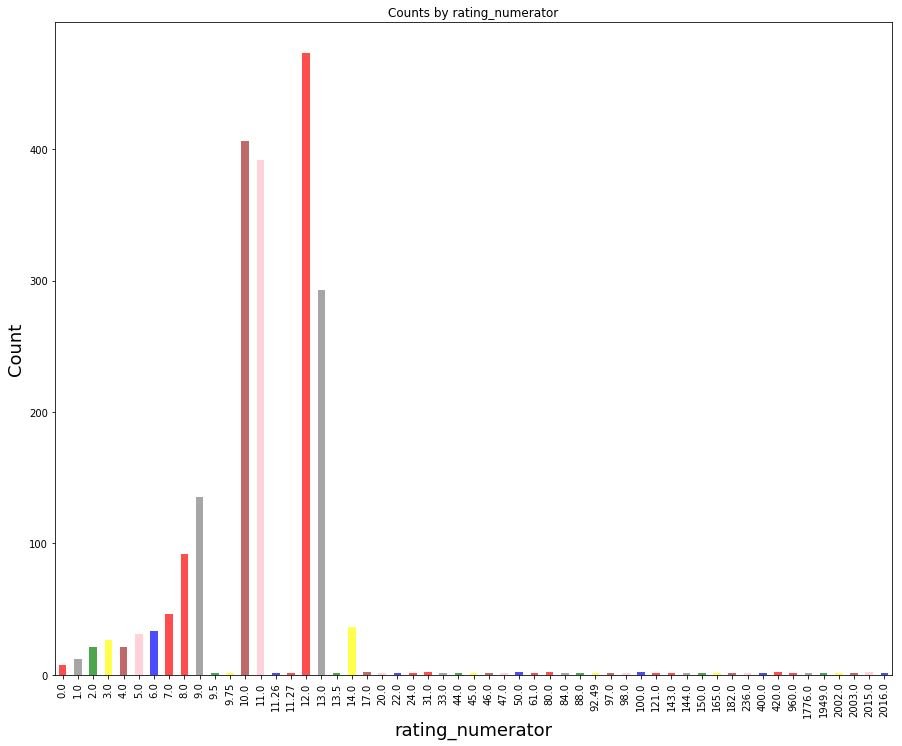

In [62]:
counts = df.groupby('rating_numerator').count()['tweet_id']
colors = ['red', 'grey', 'green', 'yellow', 'brown', 'pink', 'blue']
counts.plot(kind='bar', title='Counts by rating_numerator', color=colors, alpha=.7, figsize = (15,12))
plt.xlabel('rating_numerator', fontsize=18)
plt.ylabel('Count', fontsize=18);

In [63]:
df.rating_numerator.mode()

0    12.0
dtype: float64

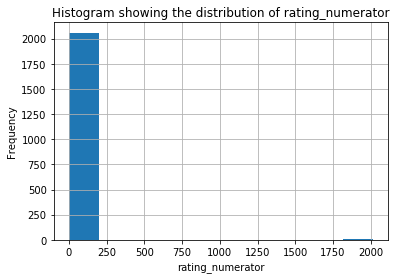

In [64]:
df.rating_numerator.hist()
plt.title('Histogram showing the distribution of rating_numerator')
plt.ylabel('Frequency');
plt.xlabel('rating_numerator');

In [65]:
df.rating_numerator.describe()

count    2071.000000
mean       19.185307
std       117.041323
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      2016.000000
Name: rating_numerator, dtype: float64

> #### The highest numerator value is 2016 while the lowest numerator value is 0. 
> #### The modal rating numerator value is 12, the median value is 11, while the mean rating_numerator value is 19.91.
> #### The distribution is right skewed.  


### Insights from the favourite_count column

In [66]:
df.favourite_count.describe()

count      2327.000000
mean       7054.124624
std       10962.261397
min           0.000000
25%        1225.000000
50%        3051.000000
75%        8604.000000
max      144883.000000
Name: favourite_count, dtype: float64

In [67]:
df.favourite_count.mode()

0    0.0
dtype: float64

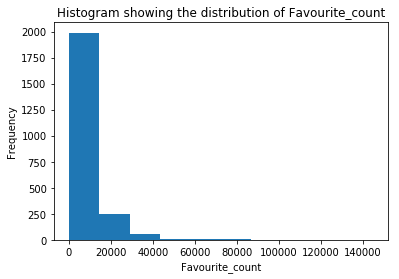

In [68]:
#to plot the favourite count distribution 
df.favourite_count.plot(kind = 'hist')
plt.title('Histogram showing the distribution of Favourite_count')
plt.xlabel('Favourite_count');

>#### From the histogram plotted, the favourite_count is skewed right with 75% entries between 0 and 8604. The mean value is 7054, median is 3051 and modal value is 0 showing there were high number of dogs without favourites.

In [69]:
# To find the percentage of dogs above the average favourite count

mean_favourite = df.favourite_count.mean()
num_above_average = len(df[df.favourite_count > mean_favourite])
length = len(df.favourite_count)
print('{} percent of dogs are above the average favourite_count. The average favourite_count value is {}'.format(round(num_above_average/length*100, 2), round(mean_favourite,2)))

29.55 percent of dogs are above the average favourite_count. The average favourite_count value is 7054.12


### Insights from the rating_numerator and favourite_count column combined

Using groupby to find insights on the rating_numerator and the favourite_count columns

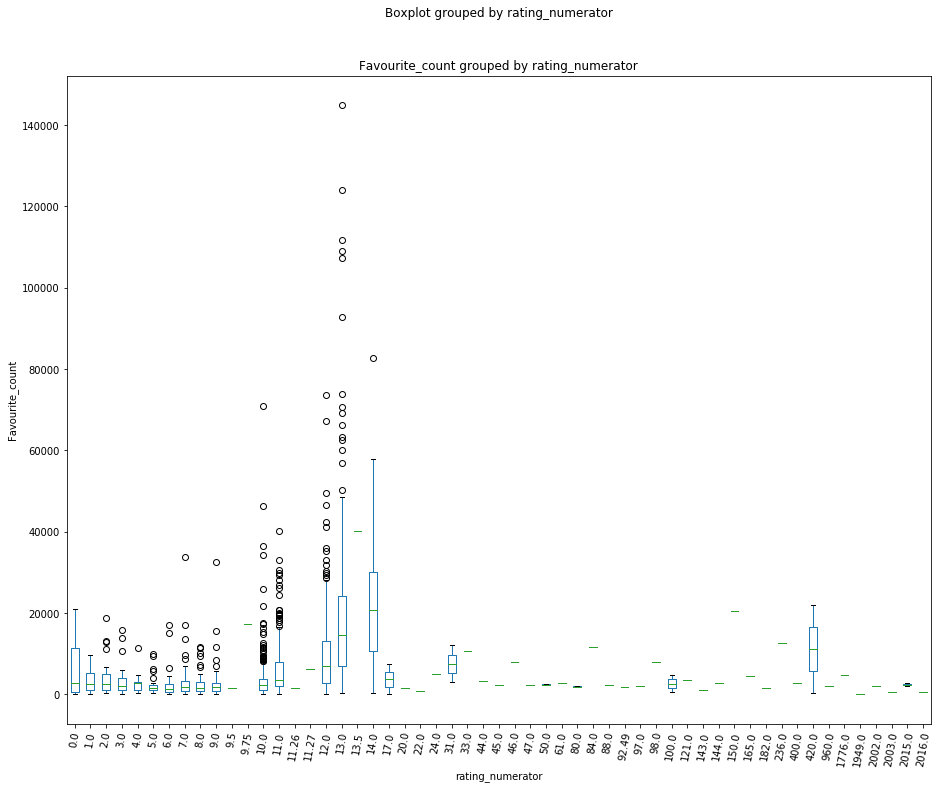

In [70]:
df.boxplot(by ='rating_numerator', column =['favourite_count'], grid = False, figsize = (15,12))
plt.title('Favourite_count grouped by rating_numerator')
plt.xlabel('rating_numerator')
plt.ylabel('Favourite_count')
plt.xticks(rotation = 80);

> #### Considering the boxplot, the rating_numerator values range from 10 to 14 after cleaning shows a trend. Disregarding the outliers, the rating_numerator of 14 has the maximum favourite_count and the highest median favourite_count when compared with other rating_numerator values of 10, 11, 12, and 13.

> #### Also, from the boxplots, considering the rating_numerator values between 10 and 14 and their corresponding favourite count distribution, the higher the rating, the greater the favourite_counts. This shows a kind of positive correlation between the rating numerator values between 10 and 14 and their corresponding favourite_count values. this relationship however does not apply to the other rating_numerator values 


### Insights from the dog_stage column
The dog_stage column has the different dog classes that the dogs were classified to. I would explore to gain insights on the dog stages. 

I would like to group the dataset with the dog_stage to find out the most popular dog_stage through the favourite_count and the retweet_count values


In [71]:
# firstly number of dog in each dog_stage class
df.dog_stage.value_counts()

pupper            213
doggo              73
puppo              24
floofer             9
doggo, pupper       9
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

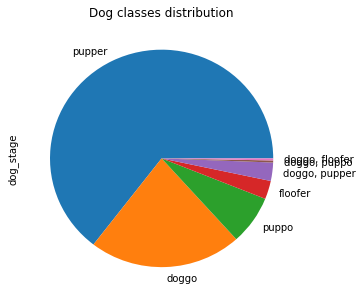

In [72]:
df.dog_stage.value_counts().plot(kind = 'pie', figsize = (5,5), title='Dog classes distribution');


> This pie chart shows that the pupper class has the highest number of dogs, followed by the doggo class. 

#### Dog_stage and retweet


In [73]:
df.groupby('dog_stage')['retweet_count'].sum()

dog_stage
doggo             386096.0
doggo, floofer      2795.0
doggo, pupper      30674.0
doggo, puppo       16141.0
floofer            30058.0
pupper            417092.0
puppo             124801.0
Name: retweet_count, dtype: float64

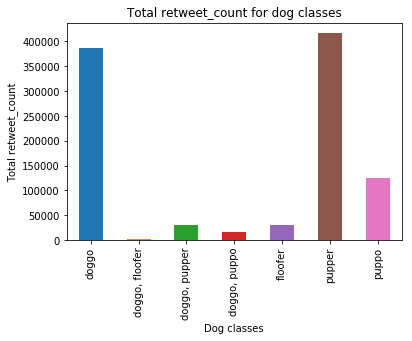

In [74]:
df.groupby('dog_stage')['retweet_count'].sum().plot(kind = 'bar')
plt.title('Total retweet_count for dog classes')
plt.xlabel('Dog classes')
plt.ylabel('Total retweet_count');

> #### Summing up all retweet counts for each dog classes shows that the pupper class has the highest number of retweet count, followed by the doggo, and puppo respectively. Please recall that the pupper class also has the highest number of dogs, followed by the doggo class. The mean value shows a normalized view of the data.

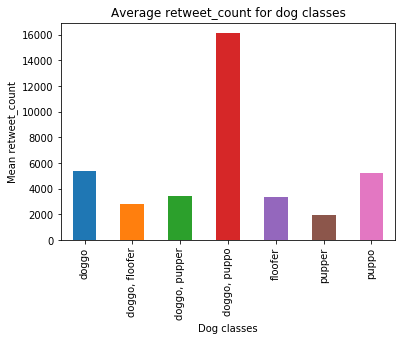

In [75]:
df.groupby('dog_stage')['retweet_count'].mean().plot(kind = 'bar')
plt.title('Average retweet_count for dog classes')
plt.xlabel('Dog classes')
plt.ylabel('Mean retweet_count');


> #### The average retweet_count plot shows that the doggo, puppo class has the highest mean retweet count, followed by the doggo and puppo class. This shows that if we had the same number of dogs in all the classes, the doggo, puppo class would have the highest retweet_count, followed by the duggo and puppo class.

#### Dog_stage and favourite_count

In [76]:
df.groupby('dog_stage')['favourite_count'].sum()

dog_stage
doggo             1142876.0
doggo, floofer      14844.0
doggo, pupper      106225.0
doggo, puppo        41916.0
floofer             84618.0
pupper            1299328.0
puppo              450947.0
Name: favourite_count, dtype: float64

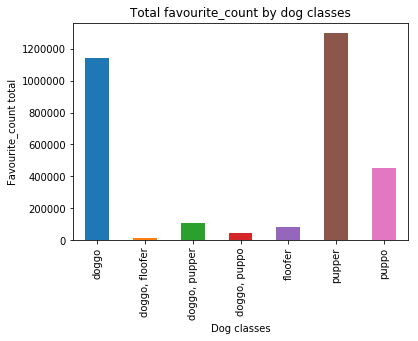

In [77]:
df.groupby('dog_stage')['favourite_count'].sum().plot(kind = 'bar')
plt.title('Total favourite_count by dog classes')
plt.xlabel('Dog classes')
plt.ylabel('Favourite_count total');

> The total sum of favourite counts by dog classes show that pupper has the highest total favourite counts, followed by doggo,  and the puppo class. Since we dont have the same number of dogs in each classes, the mean shows a better distribution of the favourite counts by the dog classes.

In [78]:
df.groupby('dog_stage')['favourite_count'].mean()

dog_stage
doggo             15873.277778
doggo, floofer    14844.000000
doggo, pupper     11802.777778
doggo, puppo      41916.000000
floofer            9402.000000
pupper             6100.131455
puppo             18789.458333
Name: favourite_count, dtype: float64

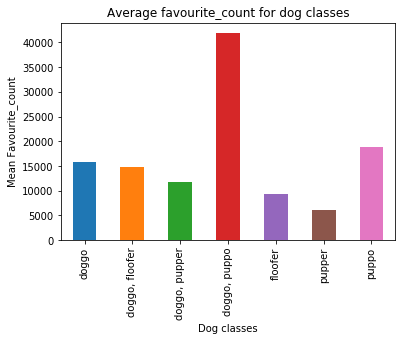

In [79]:
df.groupby('dog_stage')['favourite_count'].mean().plot(kind = 'bar')
plt.title('Average favourite_count for dog classes')
plt.xlabel('Dog classes')
plt.ylabel('Mean Favourite_count');

>Considering the mean favourite_counts for the dog classes, doggo, puppo class has the highest average number of favourite_count of above 42,000. This is followed by puppo, and the doggo class.

It seem that the doggo, puppo class has the highest retweet and favourite counts and the charts are somewhat in agreement. Thus, I would like to find the correlation between the favourite count and retweet.

### Correlation between  favourite_count and retweet_count



In [80]:
df['retweet_count'].corr(df['favourite_count'])

0.80162858063459841

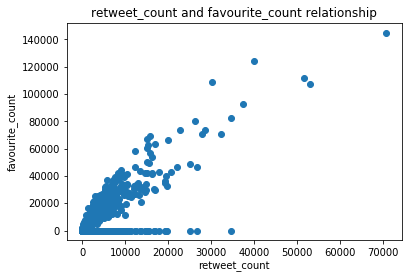

In [81]:
plt.scatter(df['retweet_count'],df['favourite_count'])
plt.title('retweet_count and favourite_count relationship')
plt.xlabel('retweet_count')
plt.ylabel('favourite_count');

> #### There is a high positive correlation between retweet_count and favourite_count. The retweet_count and favourite_count are positively correlated. 

### Top Favourite dogs

In [82]:
df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage',
       'retweet_count', 'favourite_count', 'jpg_url', 'img_num',
       'first_prediction', 'first_prediction_confidence',
       'first_prediction_correct', 'second_prediction',
       'sec_prediction_confidence', 'sec_prediction_correct',
       'third_prediction', ' third_prediction_confidence',
       'third_prediction_correct'],
      dtype='object')

In [83]:
# create a dataframe for finding insights on the dogs with the highest number of favourite counts
favourite_dogs = df.loc[:,['favourite_count','jpg_url','rating_numerator', 'retweet_count','first_prediction','name']]
favourite_dogs[:2]

favourite_count                                          jpg_url  \
0          33811.0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   
1          29330.0  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   

   rating_numerator  retweet_count first_prediction     name  
0              13.0         7009.0           orange  Phineas  
1              13.0         5301.0        Chihuahua    Tilly

In [84]:
favourite_dogs.head(5)

favourite_count                                          jpg_url  \
0          33811.0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   
1          29330.0  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2          22049.0  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
3          36937.0  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
4          35310.0  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   

   rating_numerator  retweet_count first_prediction      name  
0              13.0         7009.0           orange   Phineas  
1              13.0         5301.0        Chihuahua     Tilly  
2              12.0         3481.0        Chihuahua    Archie  
3              13.0         7225.0      paper_towel     Darla  
4              12.0         7760.0           basset  Franklin

In [85]:
#count the number of duplicates
favourite_dogs.duplicated().sum()

0

In [86]:
# to sort data by the favourite_count from highest to smallest and store in dataframe
favourite_dogs = favourite_dogs.sort_values(by = 'favourite_count', axis = 0, ascending = False)[:10]

In [87]:
favourite_dogs.head(5)

favourite_count                                            jpg_url  \
842         144883.0  https://pbs.twimg.com/ext_tw_video_thumb/74423...   
342         124115.0    https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg   
439         111697.0  https://pbs.twimg.com/ext_tw_video_thumb/80710...   
117         108906.0    https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg   
877         107250.0  https://pbs.twimg.com/ext_tw_video_thumb/73923...   

     rating_numerator  retweet_count    first_prediction     name  
842              13.0        70732.0  Labrador_retriever     None  
342              13.0        39923.0    Lakeland_terrier     None  
439              13.0        51681.0           Chihuahua  Stephan  
117              13.0        30210.0      French_bulldog   Jamesy  
877              13.0        52899.0          Eskimo_dog     None

>This table shows the top five most favourite dogs.

In [88]:
print('This is the Number 1 favourite dog. It is a {}. It was rated as{} /10, favourite count is {}, retweet count is {}'.format(favourite_dogs.first_prediction.iloc[0],
                                                                                                                                 favourite_dogs.rating_numerator.iloc[0],
                                                                                                                                 favourite_dogs.favourite_count.iloc[0],
                                                                                                                                 favourite_dogs.retweet_count.iloc[0]))

This is the Number 1 favourite dog. It is a Labrador_retriever. It was rated as13.0 /10, favourite count is 144883.0, retweet count is 70732.0


### This is the Number 1 favourite dog. It is a Labrador_retriever. It was rated as13.0 /10, favourite count is 144883.0, retweet count is 70732.0

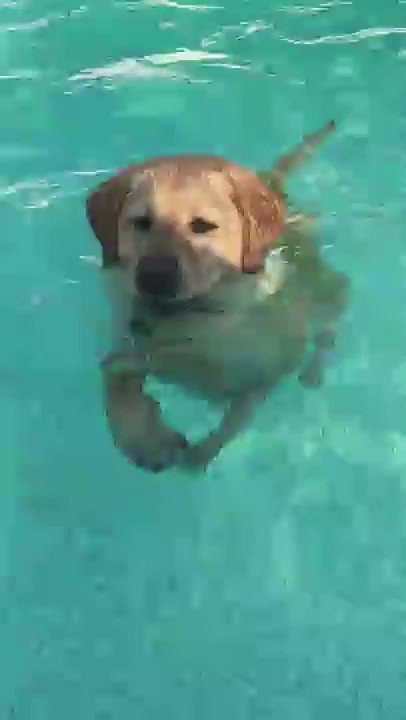

In [89]:
# Number 1 favourite dog
url = favourite_dogs.jpg_url.iloc[0]
r = requests.get(url)
Image.open(BytesIO(r.content))


In [90]:
print('This is the Number 2 favourite dog. It is a {}. It was rated as {}/10, favourite count is {}, retweet count is {}'.format(favourite_dogs.first_prediction.iloc[1],
                                                                                                                                 favourite_dogs.rating_numerator.iloc[1],
                                                                                                             favourite_dogs.favourite_count.iloc[1],
                                                                                                             favourite_dogs.retweet_count.iloc[1]))

This is the Number 2 favourite dog. It is a Lakeland_terrier. It was rated as 13.0/10, favourite count is 124115.0, retweet count is 39923.0


### This is the Number 2 favourite dog. It is a Lakeland_terrier. It was rated as 13.0/10, favourite count is 124115.0, retweet count is 39923.0

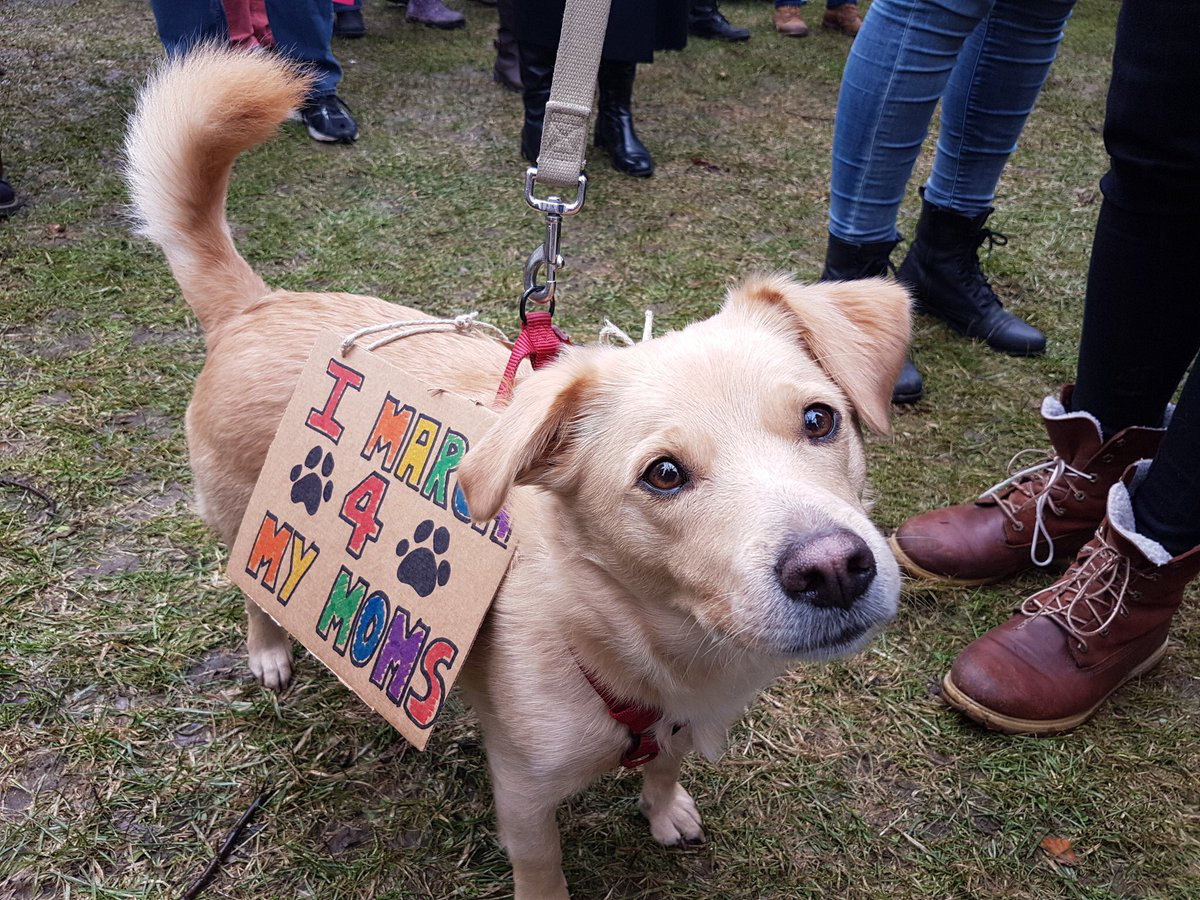

In [91]:
# Number 2 favourite dog
url = favourite_dogs.jpg_url.iloc[1]
r = requests.get(url)
Image.open(BytesIO(r.content))

In [92]:
print('This is the Number 3 favourite dog. It is a {}. It was rated as {}/10, favourite count is {}, retweet count is {}'.format(favourite_dogs.first_prediction.iloc[2],
                                                                                                                                 favourite_dogs.rating_numerator.iloc[2],
                                                                                                             favourite_dogs.favourite_count.iloc[2],
                                                                                                             favourite_dogs.retweet_count.iloc[2]))

This is the Number 3 favourite dog. It is a Chihuahua. It was rated as 13.0/10, favourite count is 111697.0, retweet count is 51681.0


### This is the Number 3 favourite dog. It is a Chihuahua. It was rated as 13.0/10, favourite count is 111697.0, retweet count is 51681.0

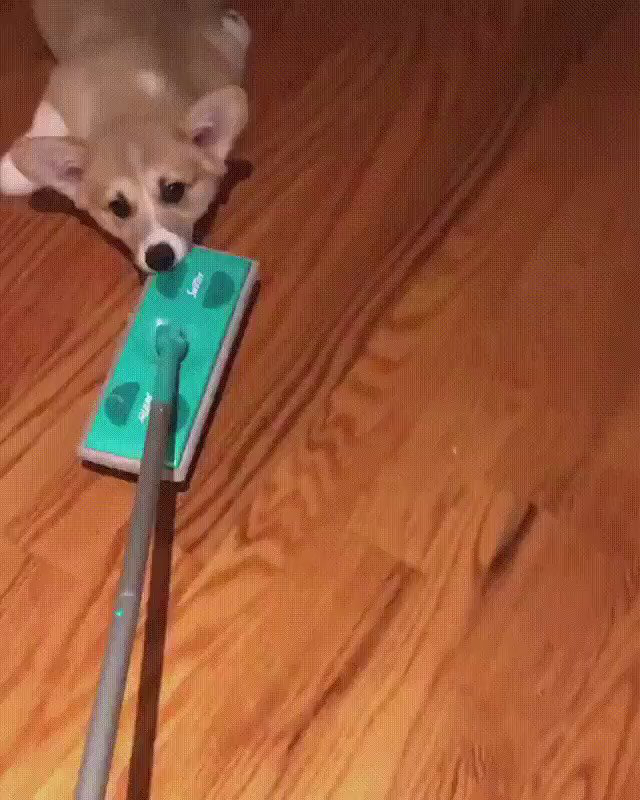

In [93]:
# Number 3 favourite dog
url = favourite_dogs.jpg_url.iloc[2]
r = requests.get(url)
Image.open(BytesIO(r.content))

In [94]:
print('This is the Number 4 favourite dog. It is a {}. It was rated as {}/10, favourite count is {}, retweet count is {}'.format(favourite_dogs.first_prediction.iloc[3],
                                                                                                                                 favourite_dogs.rating_numerator.iloc[3],
                                                                                                             favourite_dogs.favourite_count.iloc[3],
                                                                                                             favourite_dogs.retweet_count.iloc[3]))

This is the Number 4 favourite dog. It is a French_bulldog. It was rated as 13.0/10, favourite count is 108906.0, retweet count is 30210.0


### This is the Number 4 favourite dog. It is a French_bulldog. It was rated as 13.0/10, favourite count is 108906.0, retweet count is 30210.0

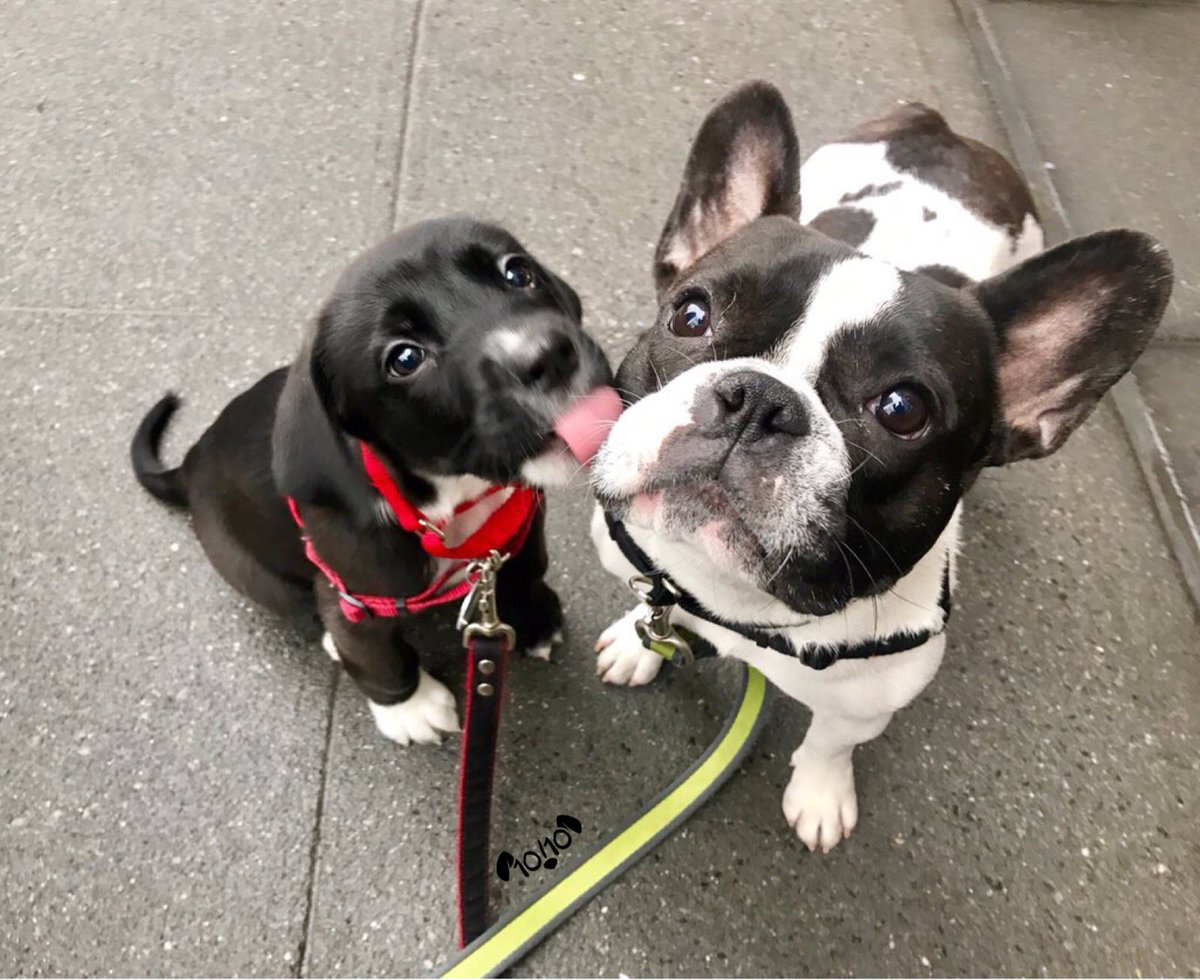

In [95]:
# Number 2 favourite dog
url = favourite_dogs.jpg_url.iloc[3]
r = requests.get(url)
Image.open(BytesIO(r.content))

In [96]:
    print('This is the Number 5 favourite dog. It is a {}. It was rated as {}/10, favourite count is {}, retweet count is {}'.format(favourite_dogs.first_prediction.iloc[4],
                                                                                                                                 favourite_dogs.rating_numerator.iloc[4],
                                                                                                             favourite_dogs.favourite_count.iloc[4],
                                                                                                             favourite_dogs.retweet_count.iloc[4]))

This is the Number 5 favourite dog. It is a Eskimo_dog. It was rated as 13.0/10, favourite count is 107250.0, retweet count is 52899.0


### This is the Number 5 favourite dog. It is a Eskimo_dog. It was rated as 13.0/10, favourite count is 107250.0, retweet count is 52899.0

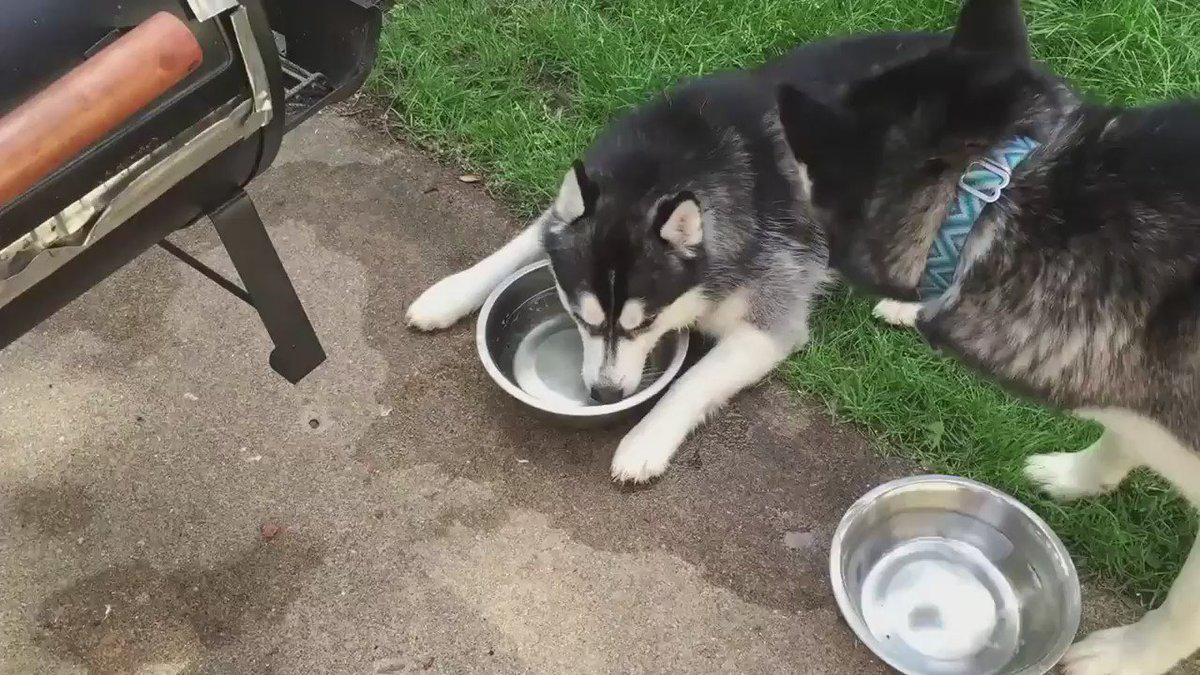

In [97]:
# Number 2 favourite dog
url = favourite_dogs.jpg_url.iloc[4]
r = requests.get(url)
Image.open(BytesIO(r.content))

next, I would consider the dog with the highest rating.

### Dog with the maximum rating value

In [98]:
max_rating_dog = favourite_dogs[favourite_dogs.rating_numerator == favourite_dogs.rating_numerator.max()]

In [99]:
max_rating_dog

favourite_count                                          jpg_url  \
368          82708.0  https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg   

     rating_numerator  retweet_count first_prediction name  
368              14.0        34546.0  standard_poodle   Bo

In [100]:
print('This is a dog with a high rating. It is a {}. It was rated as {}/10, favourite count is {}, retweet count is {}'.format(max_rating_dog.first_prediction.iloc[0],
                                                                                                                                 max_rating_dog.rating_numerator.iloc[0],
                                                                                                             max_rating_dog.favourite_count.iloc[0],
                                                                                                             max_rating_dog.retweet_count.iloc[0]))

This is a dog with a high rating. It is a standard_poodle. It was rated as 14.0/10, favourite count is 82708.0, retweet count is 34546.0


### This is a dog with a highest rating. It is a standard_poodle. It was rated as 14.0/10, favourite count is 82708.0, retweet count is 34546.0

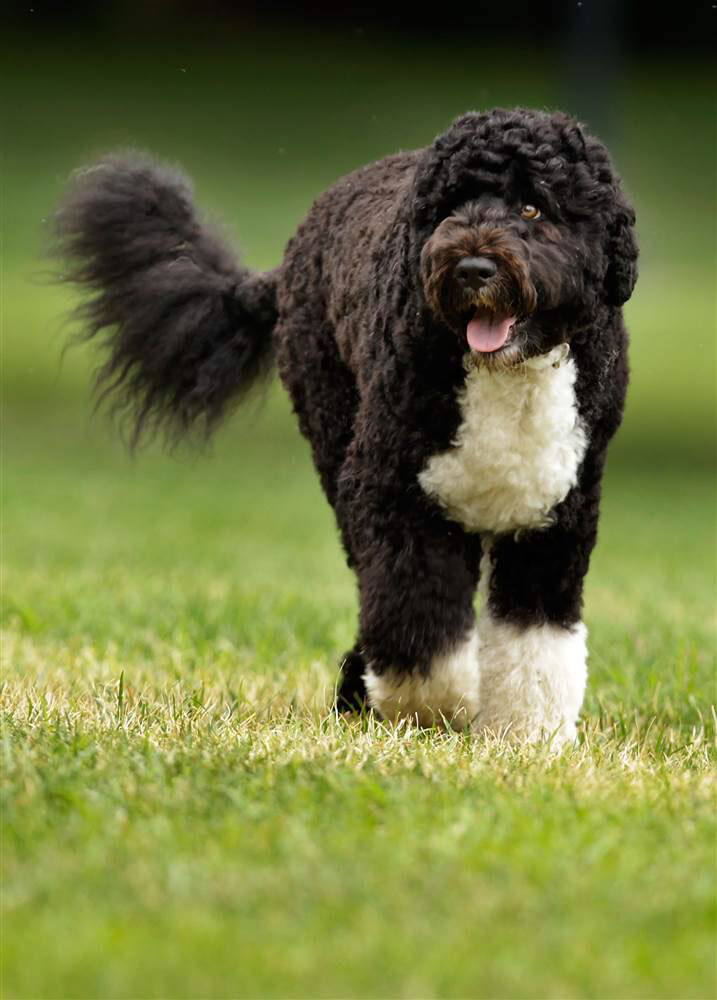

In [101]:
# Number 2 favourite dog
url = max_rating_dog.jpg_url.iloc[0]
r = requests.get(url)
Image.open(BytesIO(r.content))

> The dog with the highest rating is not the dog that has the most favourite count. 

I would like to see if there is a correlation between rating_numerator and favourite_count

### Checking for correlation between rating_numerator and favourite_count

In [102]:
df['rating_numerator'].corr(df['favourite_count'])

-0.026225671827816294

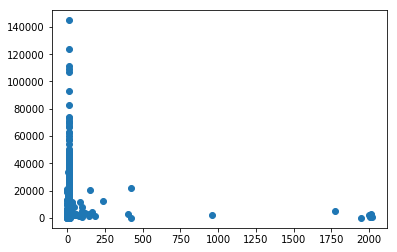

In [103]:
plt.scatter(df['rating_numerator'], df['favourite_count']);


> #### There is no correlation relationship between the rating_numerator and the favourite_count. 